![](./Resources/ai-sk-add-wechat.png)

# Semantic Kernel 对接国内大模型（智谱AI)
SK 目前提供了多个AI 提供商的Connector，但仅OpenAI 和Azure OpenAI 两种Connector（连接器）属于正式可用状态，国内开发者而言并不能访问国外大模型，因此如何使用国内大模型（通义、智谱等）玩转 Semantic Kernel呢？好在，SK 在设计时也考虑了这个问题，接下来就来以**智谱AI**大模型为例来解密答案。

# 注册智谱大模型
> 北京智谱华章科技有限公司（简称“智谱AI”）致力于打造新一代认知智能大模型，专注于做大模型的中国创新。打造了AIGC模型及产品矩阵，包括通用大模型、超拟人大模型、图像大模型、向量大模型等，并且支持使用您的私有数据对模型进行微调。包括AI提效助手智谱清言（chatglm.cn）、高效率代码模型CodeGeeX、多模态理解模型CogVLM和文生图模型CogView等，涵盖了文生文、图片和视频的生成及理解、代码生成、向量嵌入。
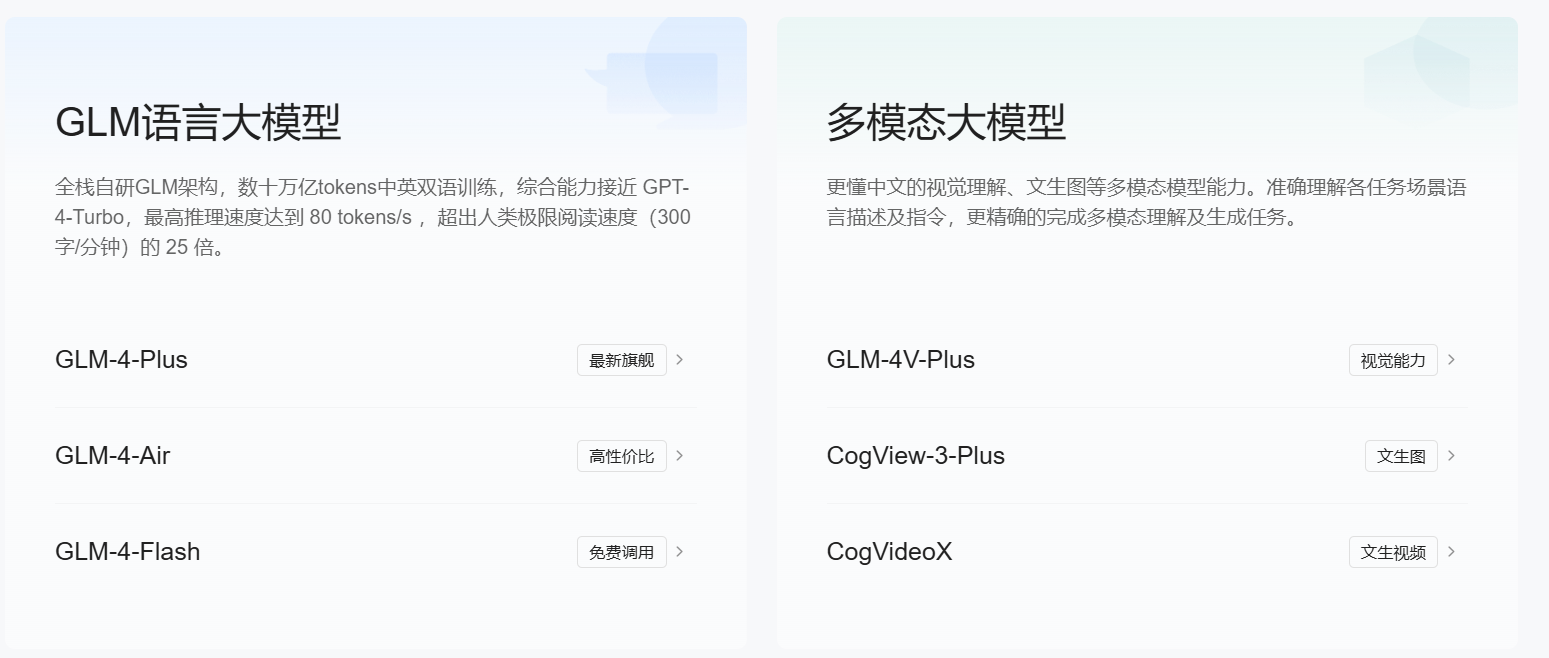

1. 注册：点击 [https://open.bigmodel.cn](https://open.bigmodel.cn) 即可访问智谱AI大模型开放平台，注册即可立享**2500万 Tokens**。当然也可以通过以下的邀请二维码注册，获取额外的`glm-4-air`模型2000万 tokens。 

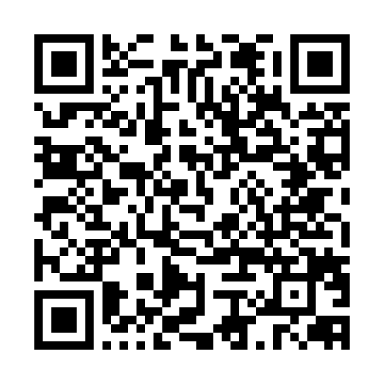

2. 生成API Key：依次点击 控制台-> API 密钥 -> 添加新的API Key -> 复制 API KEY 待用 。

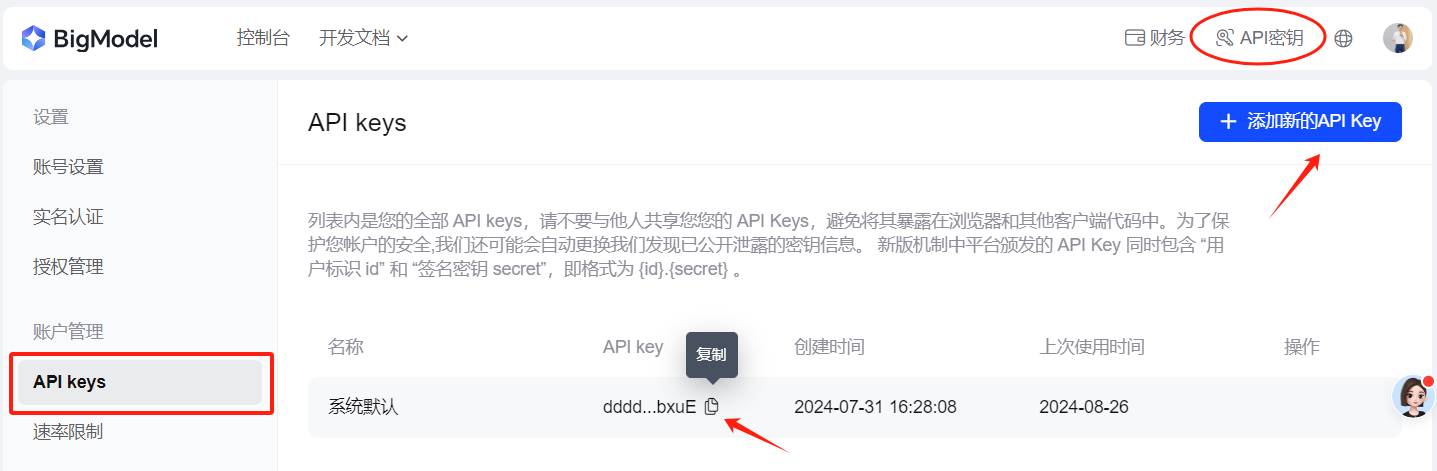

3. 智谱大模型列表：[控制台-模型中心-模型广场](https://open.bigmodel.cn/console/modelcenter/square)。

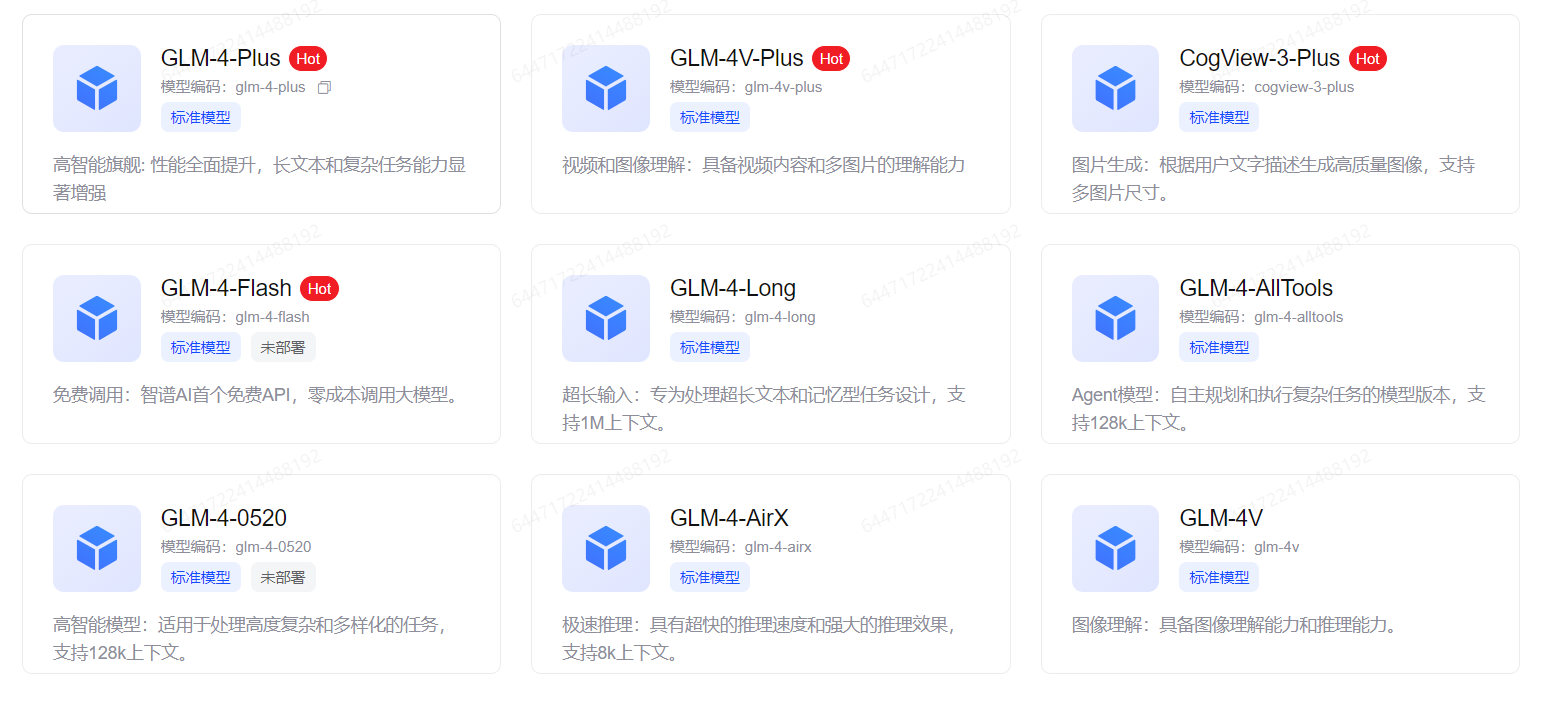

# 使用智谱大模型
由于SK 默认仅提供了OpenAI 和Azure OpenAI 两种Connector（连接器），因此如果需要使用智谱大模型，有四种做法：
1. 指定自定义`Endpoint` 实现。
2. 指定自定义`OpenAIClient`。
3. 使用代理，诸如OneApi
4. 自行实现 Connectors

In [1]:
#r "nuget: Microsoft.SemanticKernel"

Installed Packages Microsoft.SemanticKernel, 1.42.0

## 指定自定义 Endpoint
该方式为实验功能，需要手动禁用warning：`#pragma warning disable SKEXP0010`

In [2]:
#pragma warning disable SKEXP0010

using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.ChatCompletion;
using Microsoft.SemanticKernel.Connectors.OpenAI;
using Microsoft.Extensions.DependencyInjection;

// 引入交互式的内核命名空间，以便用户输入
using PolyglotKernel= Microsoft.DotNet.Interactive.Kernel;

// var zhipuApiKey = await PolyglotKernel.GetInputAsync("请输入您的智谱API Key："); 
var zhipuApiKey = "ddddc01549175d4c18e65a70e0d8329d.jAFiuW3FfK5PbxuE";

// Create kernel builder
var builder = Kernel.CreateBuilder();

var zhipuEndpoint = new Uri("https://open.bigmodel.cn/api/paas/v4/");
// Add OpenAI Chat completion
builder.AddOpenAIChatCompletion(
    modelId: "glm-4-flash", // 可选模型编码：glm-4-plus、glm-4-0520、glm-4 、glm-4-air、glm-4-airx、glm-4-long、 glm-4-flash(免费)
    apiKey: zhipuApiKey,
    endpoint: zhipuEndpoint);
// Build kernel
var kernel = builder.Build();

var response = await kernel.InvokePromptAsync("介绍下智谱AI的产品和服务");
response.Display();

智谱AI是一家专注于人工智能领域的科技公司，提供了一系列的产品和服务，旨在帮助企业实现智能化升级，提高效率和创新能力。以下是智谱AI的主要产品和服务：\n\n1. **智谱AI平台**：\n - 提供一站式的人工智能解决方案，包括机器学习、深度学习、自然语言处理等。\n - 提供可视化操作界面，方便用户进行模型训练、部署和监控。\n\n2. **智能数据分析**：\n - 利用大数据分析技术，帮助用户从海量数据中挖掘有价值的信息。\n - 提供数据预处理、数据挖掘、数据可视化等服务。\n\n3. **智能语音识别与合成**：\n - 支持多种语言的语音识别和语音合成。\n ... Function InvokePromptAsync_e07a5e8927dc45de90d1ecb5e151086c Name InvokePromptAsync_e07a5e8927dc45de90d1ecb5e151086c PluginName <null> Description Generic function, unknown purpose Metadata Microsoft.SemanticKernel.KernelFunctionMetadata Name InvokePromptAsync_e07a5e8927dc45de90d1ecb5e151086c PluginName <null> Description Generic function, unknown purpose Parameters (empty) ReturnParameter Microsoft.SemanticKernel.KernelReturnParameterMetadata Description ParameterType <null> Schema <null> AdditionalProperties (empty) ExecutionSettings (empty) Metadata key type value Id System.String 202503242015545de95a01d8b74793 CreatedAt System.DateTimeOffset 2025-03-24 12:16:06Z SystemFingerprint <null> <null> Usage OpenAI.Chat.ChatTokenUsage OpenAI.Chat.ChatTokenUsage OutputTokenCount 427 InputTokenCount 12 TotalTokenCount 439 OutputTokenDetails <null> InputTokenDetails <null> Refusal <null> <null> FinishReason System.String Stop ContentTokenLogProbabilities OpenAI.ChangeTrackingList<OpenAI.Chat.ChatTokenLogProbabilityDetails> Culture Parent Parent Parent Parent Parent LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - TextInfo TextInfo - IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo DateTimeFormat System.Globalization.DateTimeFormatInfo Calendar System.Globalization.GregorianCalendar OptionalCalendars [ System.Globalization.GregorianCalendar ] UseUserOverride False IsReadOnly True LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - Name Version System.Globalization.SortVersion LCID 127 TextInfo TextInfo - ANSICodePage 1252 OEMCodePage 437 MacCodePage 10000 EBCDICCodePage 37 LCID 127 CultureName IsReadOnly True ListSeparator , IsRightToLeft False IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo CurrencyDecimalDigits 2 CurrencyDecimalSeparator . IsReadOnly True CurrencyGroupSizes [ 3 ] NumberGroupSizes [ 3 ] PercentGroupSizes [ 3 ] CurrencyGroupSeparator , CurrencySymbol ¤ NaNSymbol NaN CurrencyNegativePattern 0 NumberNegativePattern 1 PercentPositivePattern 0 PercentNegativePattern 0 NegativeInfinitySymbol -Infinity NegativeSign - NumberDecimalDigits 2 NumberDecimalSeparator . NumberGroupSeparator , CurrencyPositivePattern 0 PositiveInfinitySymbol Infinity PositiveSign + PercentDecimalDigits 2 PercentDecimalSeparator . PercentGroupSeparator , PercentSymbol % PerMilleSymbol ‰ NativeDigits [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ] DigitSubstitution None DateTimeFormat System.Globalization.DateTimeFormatInfo AMDesignator AM Calendar System.Globalization.GregorianCalendar DateSeparator / FirstDayOfWeek Sunday CalendarWeekRule FirstDay FullDateTimePattern dddd, dd MMMM yyyy HH:mm:ss LongDatePattern dddd, dd MMMM yyyy LongTimePattern HH:mm:ss MonthDayPattern MMMM dd PMDesignator PM RFC1123Pattern ddd, dd MMM yyyy HH':'mm':'ss 'GMT' ShortDatePattern MM/dd/yyyy ShortTimePattern HH:mm SortableDateTimePattern yyyy'-'MM'-'dd'T'HH':'mm':'ss TimeSeparator : UniversalSortableDateTimePattern yyyy'-'MM'-'dd HH':'mm':'ss'Z' YearMonthPattern yyyy MMMM AbbreviatedDayNames [ Sun, Mon, Tue,

## 指定自定义OpenAIClient

In [21]:
using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.ChatCompletion;
using Microsoft.SemanticKernel.Connectors.OpenAI;
using Microsoft.Extensions.DependencyInjection;
using OpenAI;
using System.ClientModel;

// 引入交互式的内核命名空间，以便用户输入

using PolyglotKernel= Microsoft.DotNet.Interactive.Kernel;

var zhipuApiKey = await PolyglotKernel.GetInputAsync("请输入您的智谱API Key："); 
// zhipuApiKey = "ddddc01549175d4c18e65a70e0d8329d.jAFiuW3FfK5PbxuE";

// Create kernel builder
var builder = Kernel.CreateBuilder();

var zhipuEndpoint = new Uri("https://open.bigmodel.cn/api/paas/v4/");
OpenAIClientOptions clientOptions = new OpenAIClientOptions();
clientOptions.Endpoint = zhipuEndpoint;

// 创建自定义的OpenAI客户端
OpenAIClient client = new(new ApiKeyCredential(zhipuApiKey), clientOptions);

// Add OpenAI Chat completion
builder.AddOpenAIChatCompletion(
    modelId: "glm-4-flash", // 可选模型编码：glm-4-plus、glm-4-0520、glm-4 、glm-4-air、glm-4-airx、glm-4-long、 glm-4-flash(免费)
    openAIClient: client);

// Build kernel
var kernel = builder.Build();

var response = await kernel.InvokePromptAsync("智谱AI有哪些模型，请直接返回模型列表。");
response.Display();

智谱AI的模型包括但不限于以下几种：\n\n1. 智谱清言（Zhipu Qingyan）\n2. 智谱清语（Zhipu Qingyu）\n3. 智谱问答（Zhipu Q&A）\n4. 智谱翻译（Zhipu Translation）\n5. 智谱知识图谱（Zhipu Knowledge Graph）\n6. 智谱自然语言处理（Zhipu NLP）\n7. 智谱对话系统（Zhipu Dialogue System）\n8. 智谱推荐系统（Zhipu Recommendation System）\n9. 智谱语音识别（Zhipu Speech Recognition）\n10. 智谱图像识别（Zhi... Function InvokePromptAsync_6d106c245f7f4769957e4115c6322553 Name InvokePromptAsync_6d106c245f7f4769957e4115c6322553 PluginName <null> Description Generic function, unknown purpose Metadata Microsoft.SemanticKernel.KernelFunctionMetadata Name InvokePromptAsync_6d106c245f7f4769957e4115c6322553 PluginName <null> Description Generic function, unknown purpose Parameters (empty) ReturnParameter Microsoft.SemanticKernel.KernelReturnParameterMetadata Description ParameterType <null> Schema <null> AdditionalProperties (empty) ExecutionSettings (empty) Metadata key type value Id System.String 202410300948156918a085b4354f4c CreatedAt System.DateTimeOffset 2024-10-30 01:48:22Z SystemFingerprint <null> <null> Usage OpenAI.Chat.ChatTokenUsage OpenAI.Chat.ChatTokenUsage OutputTokenCount 177 InputTokenCount 17 TotalTokenCount 194 OutputTokenDetails <null> Refusal <null> <null> FinishReason System.String Stop ContentTokenLogProbabilities OpenAI.ChangeTrackingList<OpenAI.Chat.ChatTokenLogProbabilityDetails> Culture Parent Parent Parent Parent Parent LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - TextInfo TextInfo - IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo DateTimeFormat System.Globalization.DateTimeFormatInfo Calendar System.Globalization.GregorianCalendar OptionalCalendars [ System.Globalization.GregorianCalendar ] UseUserOverride False IsReadOnly True LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - Name Version System.Globalization.SortVersion LCID 127 TextInfo TextInfo - ANSICodePage 1252 OEMCodePage 437 MacCodePage 10000 EBCDICCodePage 37 LCID 127 CultureName IsReadOnly True ListSeparator , IsRightToLeft False IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo CurrencyDecimalDigits 2 CurrencyDecimalSeparator . IsReadOnly True CurrencyGroupSizes [ 3 ] NumberGroupSizes [ 3 ] PercentGroupSizes [ 3 ] CurrencyGroupSeparator , CurrencySymbol ¤ NaNSymbol NaN CurrencyNegativePattern 0 NumberNegativePattern 1 PercentPositivePattern 0 PercentNegativePattern 0 NegativeInfinitySymbol -Infinity NegativeSign - NumberDecimalDigits 2 NumberDecimalSeparator . NumberGroupSeparator , CurrencyPositivePattern 0 PositiveInfinitySymbol Infinity PositiveSign + PercentDecimalDigits 2 PercentDecimalSeparator . PercentGroupSeparator , PercentSymbol % PerMilleSymbol ‰ NativeDigits [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ] DigitSubstitution None DateTimeFormat System.Globalization.DateTimeFormatInfo AMDesignator AM Calendar System.Globalization.GregorianCalendar DateSeparator / FirstDayOfWeek Sunday CalendarWeekRule FirstDay FullDateTimePattern dddd, dd MMMM yyyy HH:mm:ss LongDatePattern dddd, dd MMMM yyyy LongTimePattern HH:mm:ss MonthDayPattern MMMM dd PMDesignator PM RFC1123Pattern ddd, dd MMM yyyy HH':'mm':'ss 'GMT' ShortDatePattern MM/dd/yyyy ShortTimePattern HH:mm SortableDateTimePattern yyyy'-'MM'-'dd'T'HH':'mm':'ss TimeSeparator : UniversalSortableDateTimePattern yyyy'-'MM'-'dd HH':'mm':'ss'Z' YearMonthPattern yyyy MMMM AbbreviatedDayNames [ Sun, Mon, Tue, Wed, Thu, Fri,